#**Képfeldolgozás alapjai 1**

Átbeszélt színmodellek:

-RGB

-RGBA

-HSL

-HSV

In [1]:
import colorsys
print(colorsys.rgb_to_hsv(1.0,1.0,1.0))
print(colorsys.rgb_to_hsv(0.0,0.0,0.0))

(0.0, 0.0, 1.0)
(0.0, 0.0, 0.0)


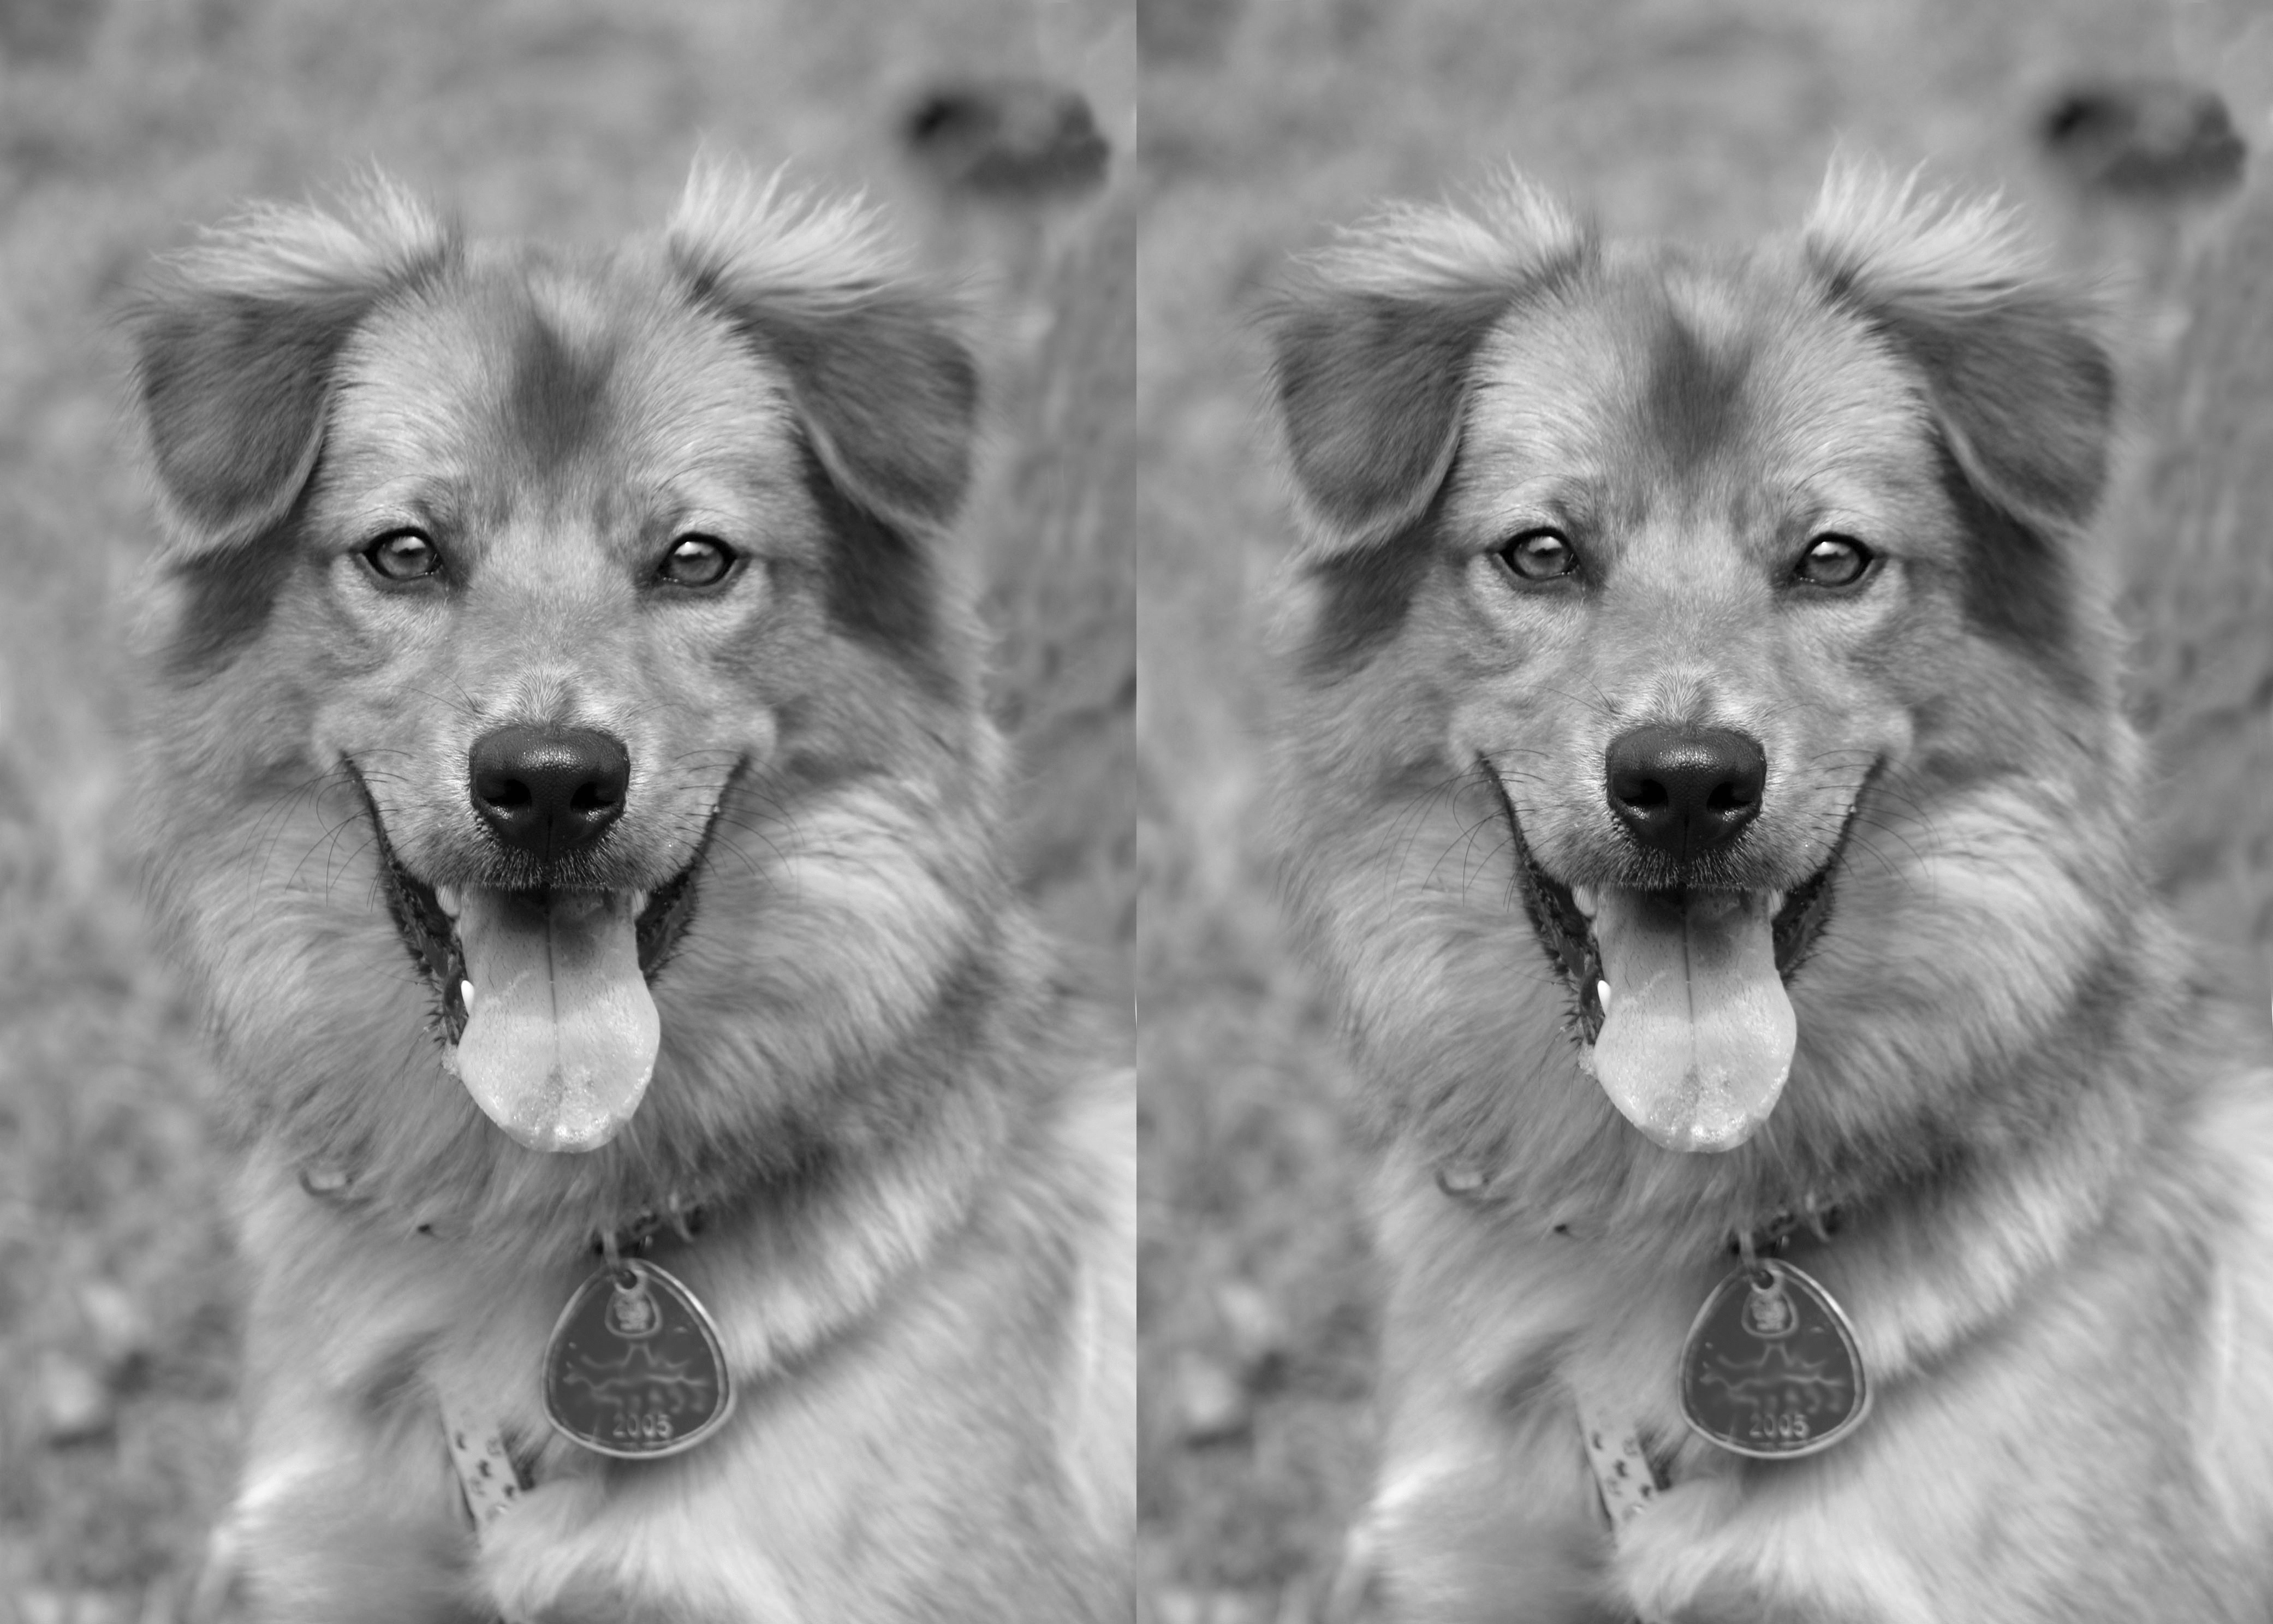

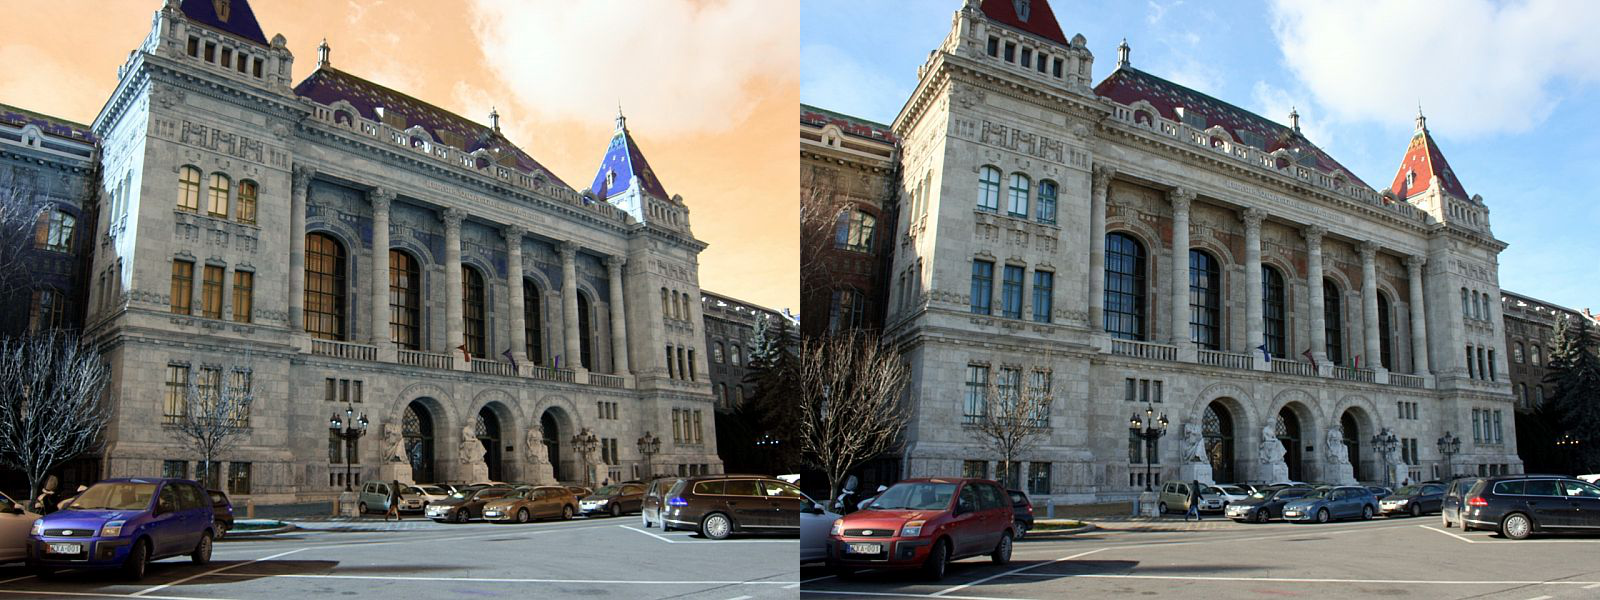

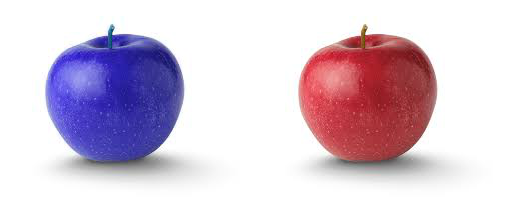

In [7]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io 
import matplotlib.pylab as plt

urls = ["https://res.cloudinary.com/demo/image/upload/e_grayscale/happy_dog.jpg","https://autopro.cscdn.hu/img/lead/308975/BME-K-%C3%A9p_200303_112856_13ee46b4b997952a6a5e326a297dfeb6.jpg","https://media.geeksforgeeks.org/wp-content/uploads/20210201174538/gfg.jpeg"]

for url in urls:
  image=io.imread(url)
  image_2=cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame=cv.hconcat((image,image_2))
  cv2_imshow(final_frame)
  print('\n')


In [6]:
print(image.shape[0]) #magassag
print(image.shape[1]) #szelesseg
print(image.shape[2]) #channel
print(image.size)
print(image)

600
800
3
1440000
[[[174 212 249]
  [174 212 249]
  [174 212 249]
  ...
  [219 231 245]
  [219 231 245]
  [219 231 245]]

 [[172 210 247]
  [172 210 247]
  [173 211 248]
  ...
  [219 231 245]
  [219 231 245]
  [219 231 245]]

 [[173 211 248]
  [173 211 248]
  [173 211 248]
  ...
  [219 231 245]
  [219 231 245]
  [219 231 245]]

 ...

 [[ 37  44  54]
  [ 37  44  54]
  [ 38  45  55]
  ...
  [145 142 133]
  [143 143 133]
  [147 147 137]]

 [[ 35  42  50]
  [ 35  42  50]
  [ 36  43  51]
  ...
  [146 143 134]
  [144 144 134]
  [147 147 137]]

 [[ 45  52  60]
  [ 46  53  61]
  [ 48  55  63]
  ...
  [154 151 142]
  [152 152 142]
  [155 155 145]]]


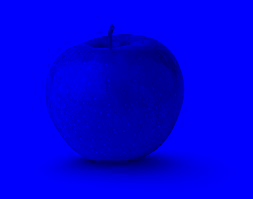

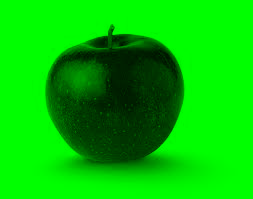

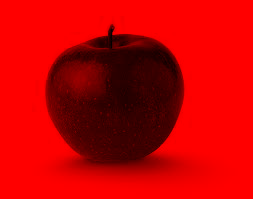

In [8]:
blue, green, red=cv.split(image)
zeros=np.zeros(blue.shape, np.uint8)

blueBGR=cv.merge((blue,zeros,zeros))
greenBGR=cv.merge((zeros,green,zeros))
redBGR=cv.merge((zeros,zeros,red))

cv2_imshow(blueBGR)
cv2_imshow(greenBGR)
cv2_imshow(redBGR)

Hisztogram

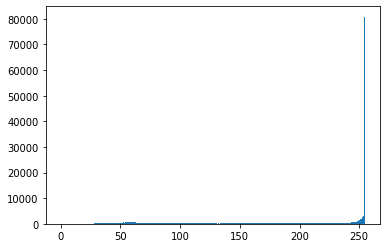

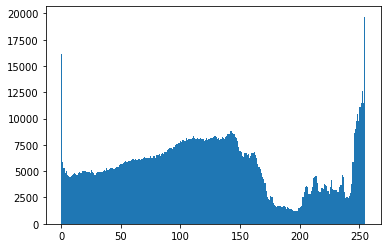

In [9]:
plt.hist(image_2.ravel(), bins=256,range=[0,255])
plt.show()

url="https://autopro.cscdn.hu/img/lead/308975/BME-K-%C3%A9p_200303_112856_13ee46b4b997952a6a5e326a297dfeb6.jpg"
image_bme=io.imread(url)
plt.hist(image_bme.ravel(), bins=256,range=[0,255])
plt.show()

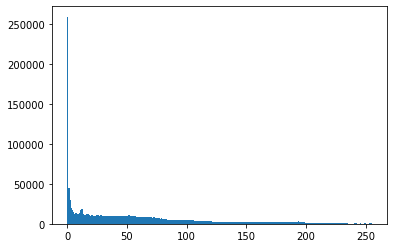

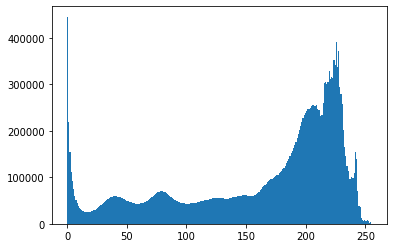

In [10]:
urls=["https://i.pinimg.com/originals/f0/5e/81/f05e81ed23d2842f95251b321991aa71.jpg", "https://i.pinimg.com/originals/99/41/93/994193de601f2c47b097649bab827f4c.jpg"]
for url in urls:
  image=io.imread(url)
  plt.hist(image.ravel(), bins=256,range=[0,255])
  plt.show()

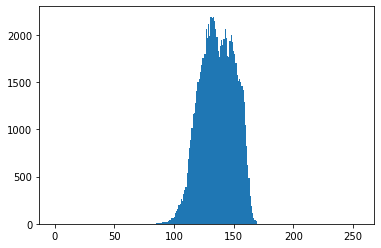

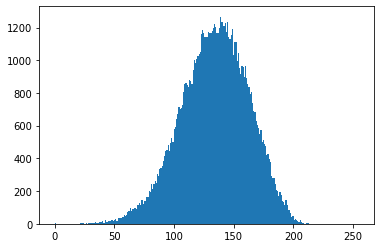

In [11]:
urls=["https://cdn.cambridgeincolour.com/images/tutorials/hist_lowcont.jpg", "https://cdn.cambridgeincolour.com/images/tutorials/hist_highcont.jpg"]
for url in urls:
  image=io.imread(url)
  plt.hist(image.ravel(), bins=256,range=[0,255])
  plt.show()

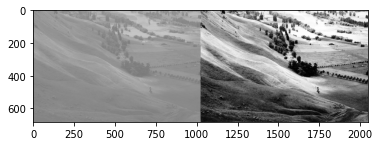

In [12]:
#https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_02a_basic_image_processing/histogram_equalization.ipynb#scrollTo=O_zbKhk5frzX
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/Unequalized_Hawkes_Bay_NZ.jpg'.split())
img = cv.imread("Unequalized_Hawkes_Bay_NZ.jpg",0)
eq=cv.equalizeHist(img)
res=np.hstack((img,eq))
plt.imshow(res, cmap='gray')

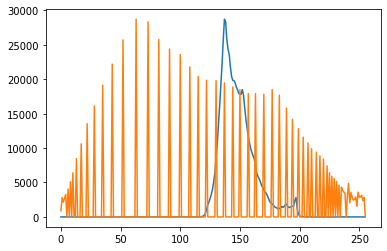

In [15]:
hist1=cv.calcHist([img],None,None,[256],[0,255])
hist2=cv.calcHist([eq],None,None,[256],[0,255])
res2=np.hstack((hist1,hist2))
plt.plot(res2)

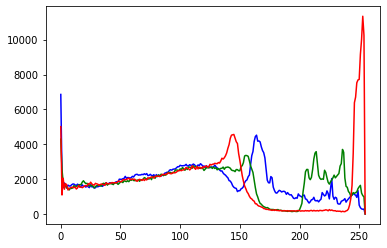

In [16]:
color=('b','g','r')
for i,col in enumerate(color):
  hist=cv.calcHist([image_bme],[i],None,[256],[0,255])
  plt.plot(hist,color=col)
plt.show()

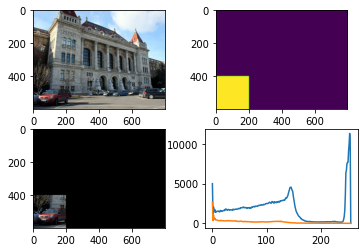

In [30]:
#image_bme.shape
mask=np.zeros(image_bme.shape[:2], np.uint8)
mask[400:600,0:200]=255
masked_image_bme=cv.bitwise_and(image_bme,image_bme,mask=mask)
hist1=cv.calcHist([image_bme],[i],None,[256],[0,255])
hist2=cv.calcHist([image_bme],[i],mask,[256],[0,255])

plt.subplot(221), plt.imshow(image_bme)
plt.subplot(222), plt.imshow(mask)
plt.subplot(223), plt.imshow(masked_image_bme)
plt.subplot(224), plt.plot(hist1), plt.plot(hist2)
plt.show()

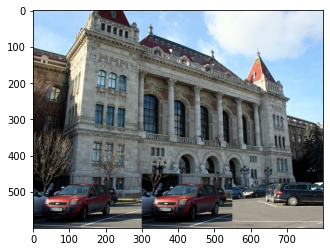

In [32]:
car=image_bme[450:600,0:250]
image_bme[450:600,300:550]=car
plt.imshow(image_bme)
plt.show()